# EDA - Project "King County House Sales"
Author: Marvin Lorenzen, lorenzen-marvin1995@gmail.com

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **yr_sale** - Year the house was sold
* **mth_sale** - Month the house was sold
* **price** -  Price of the house
* **bedrooms** - Numbers of Bedrooms/House
* **bathrooms** - Numbers of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## import libraries and data

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np

%matplotlib inline

In [61]:
df = pd.read_csv("King_County_House_prices_dataset.csv")

# first overview of the data 

In [62]:
df.shape

(21597, 21)

In [63]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


- the dataset has 21 columns and 21597 rows 
- only the columns "sqft_basement" and "date" are object datatypes
- the columns "waterfront", "view" and "yr_renovated" have missing data

# data cleaning

In [65]:
incomplete = pd.DataFrame(df.isnull().sum(), columns=["count"])
incomplete["relationship"] = incomplete["count"]/21597*100
incomplete[incomplete["count"]!=0]

,count,relationship
waterfront,2376,11.001528
view,63,0.291707
yr_renovated,3842,17.789508


In [66]:
df.shape

(21597, 21)

In [67]:
df.dropna().shape

(15762, 21)

- waterfront, view, yr_renovated have incomplete data
- with 18% the column yr_renoveted has the most missing entries
- if i drop all rows with missing data, i lose 1/4 of my data 
- to continue working with all the data, I replace the NaN data against the median
- there is a systematic for the missing data?

In [68]:
df[["waterfront", "view", "yr_renovated"]].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [69]:
df["waterfront"] = df["waterfront"].fillna(value=0)
df["view"] = df["view"].fillna(value=0)
df["yr_renovated"] = df["yr_renovated"].fillna(value=0)
df.dropna().shape

(21597, 21)

In [70]:
# check that is always true that "sqft_basement" = "sqft_living" - sqft_above"
test_df = df[["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "floors"]][df["sqft_basement"]!= "?"]
#print(pd.to_numeric(test_df["sqft_living"] - test_df["sqft_above"], downcast="float"),test_df["sqft_basement"])
k2 = pd.to_numeric(test_df["sqft_basement"], downcast="float") == pd.to_numeric(test_df["sqft_living"] - test_df["sqft_above"], downcast= "float")
k2.value_counts()

True    21143
dtype: int64

In [71]:
df["sqft_basement2"]= df["sqft_living"] - df["sqft_above"]
df.info()
df.drop("sqft_basement", axis=1, inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21597 non-null int64
dtypes: float64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [72]:
newdate = df["date"].str.split("/", expand=True)
df["yr_sale"] = pd.to_numeric(newdate[2])
df["mth_sale"] = pd.to_numeric(newdate[0])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21597 non-null int64
yr_sale           21597 non-null int64
mth_sale        

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,2014,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2015,2


In [73]:
df.drop("date", axis =1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2015,2


# data exploration 

## "waterfront"

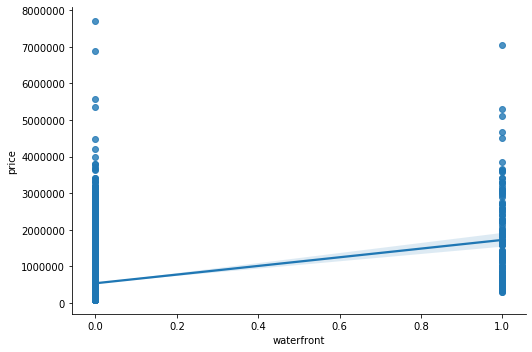

In [74]:
sns.lmplot("waterfront", "price", data=df, aspect=1.5);

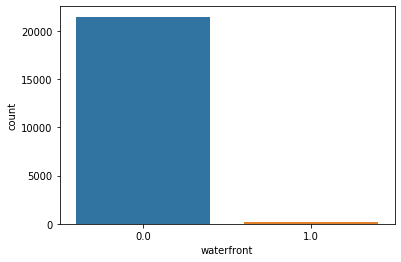

In [75]:
sns.countplot(df["waterfront"])

## "view"

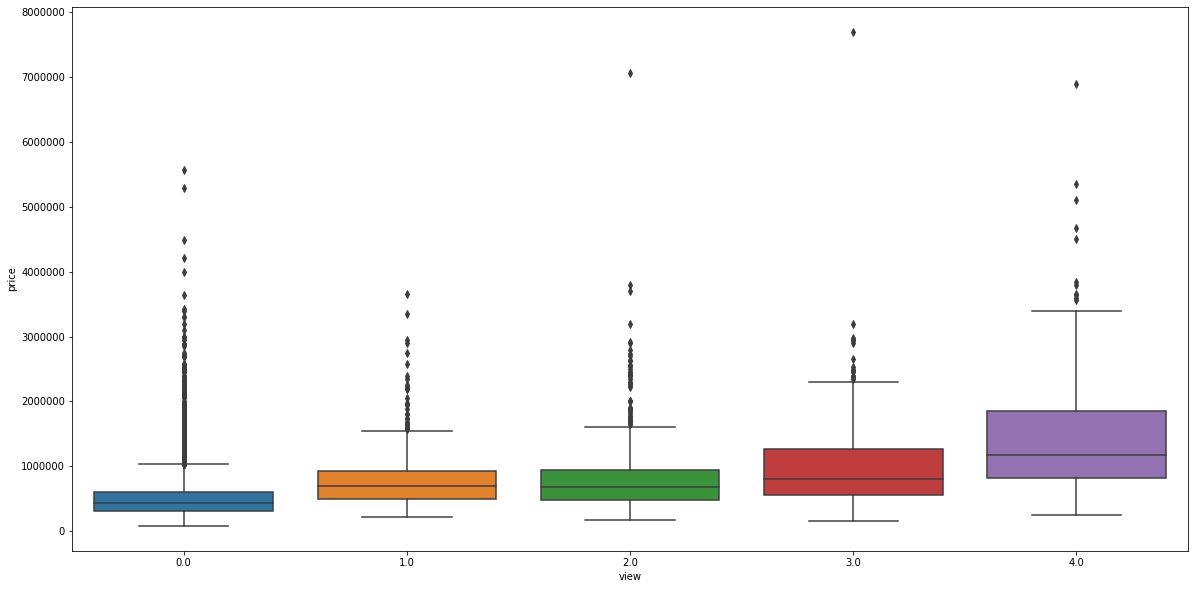

In [76]:
df_view = pd.concat([df["price"], df["view"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="view", y="price", data=df_view)

## "bathrooms"

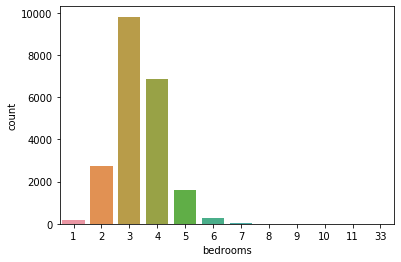

In [77]:
sns.countplot(df["bedrooms"])

## "sqft_living"

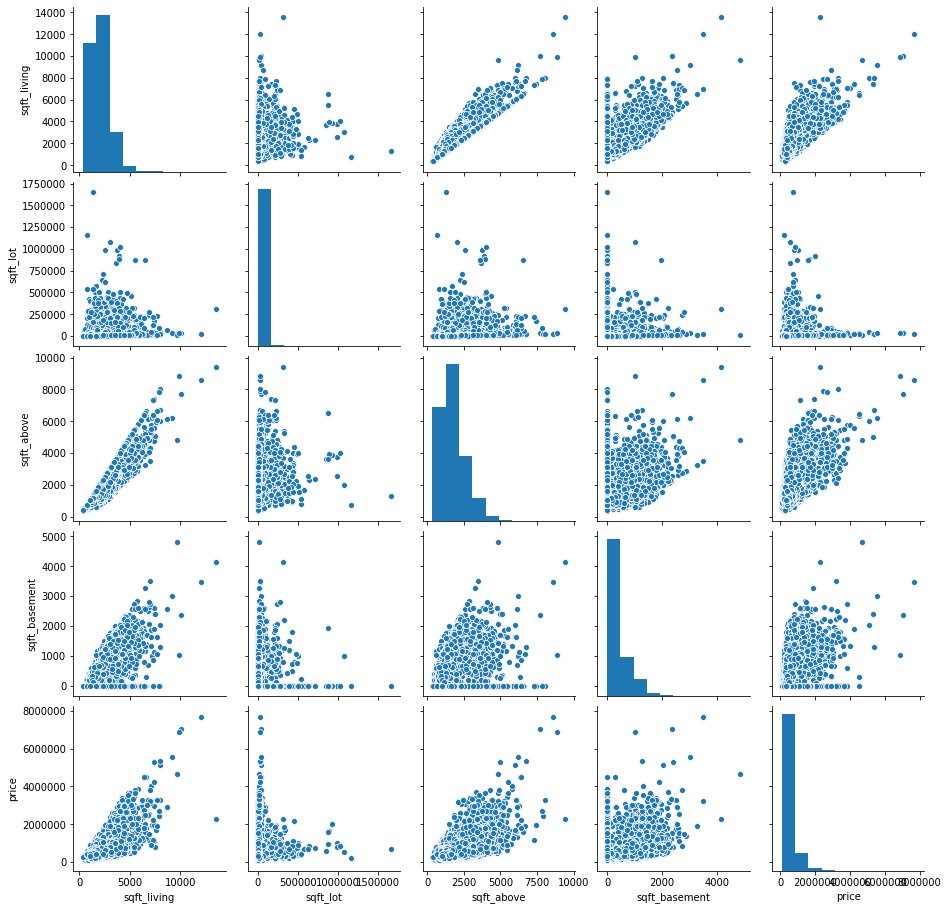

In [78]:
property_df =pd.DataFrame(df["sqft_living"])
property_df["sqft_lot"] = df["sqft_lot"]
property_df["sqft_above"] = df["sqft_above"] 
property_df["sqft_basement"] = df["sqft_basement2"]
property_df["price"] = df["price"]
sns.pairplot(property_df)

## "condition" 

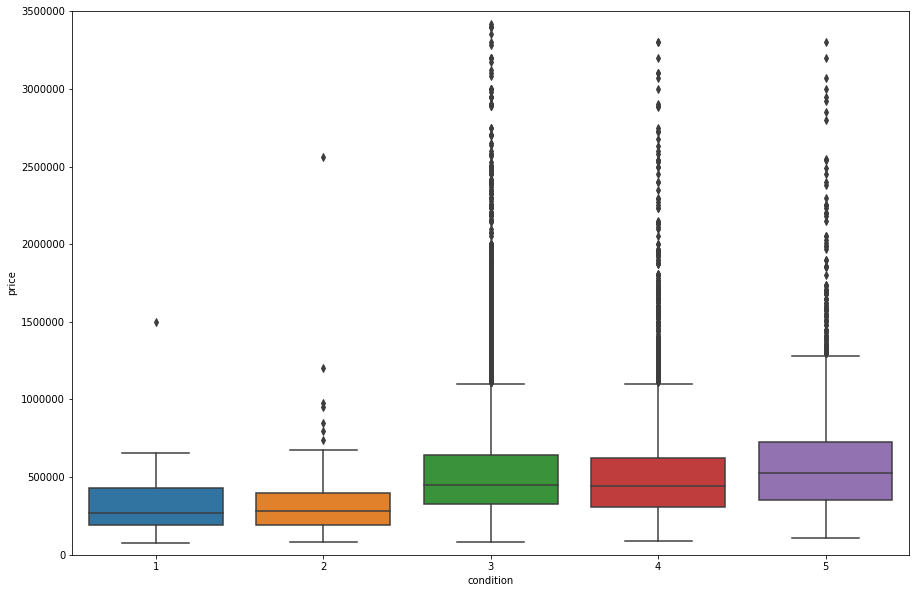

In [128]:
data_condition = pd.concat([df["price"], df["condition"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="condition", y="price", data=data_condition)
fig.axis(ymin=0, ymax=3500000);

## "grade"

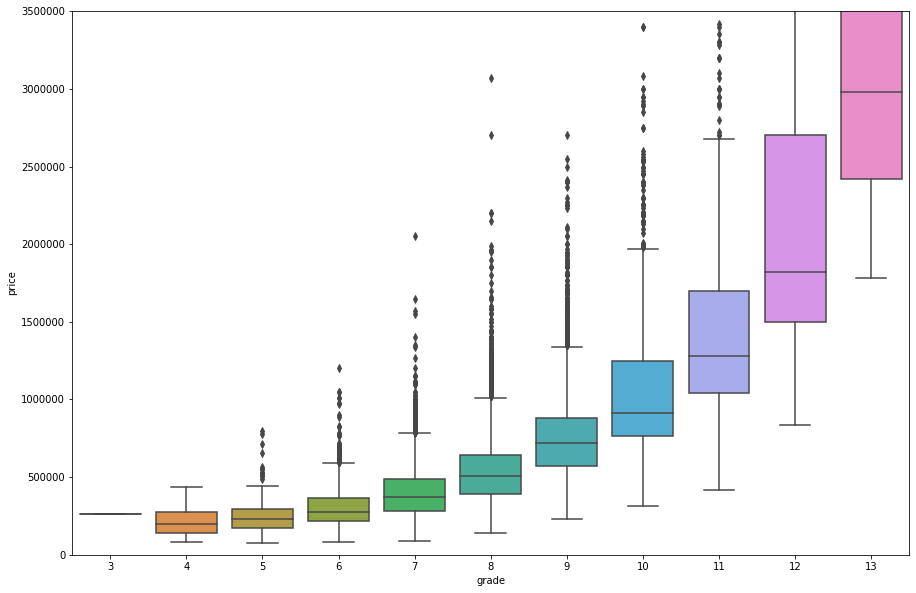

In [80]:
data_grade = pd.concat([df["price"], df["grade"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="grade", y="price", data=data_grade)
fig.axis(ymin=0, ymax=3500000);

## "sqft_living15"

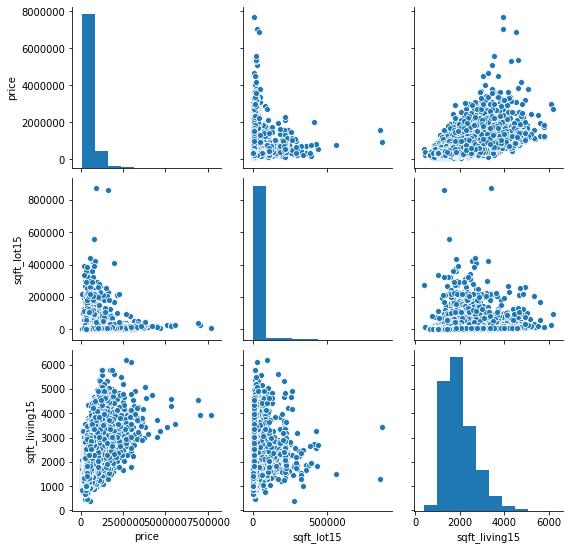

In [81]:
sns.pairplot(df[["price", "sqft_lot15", "sqft_living15"]])

## "price"

In [82]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <a list of 10 Patch objects>)

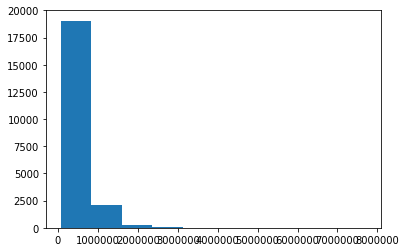

In [83]:
plt.hist(df['price'])

In [84]:
plt.hist 

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

# feature engineering

## "zipcode"

In [184]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [200]:
df["zipcodeprice"] = (df.groupby("zipcode")["price"].median()>df["price"].median()) 
#dummy_reno_yes = pd.get_dummies(df["renoyes"], prefix="reno_yes")
#df["reno_yes"]=dummy_reno_yes["reno_yes_True"]
#df.drop("renoyes", axis =1, inplace=True)
df.head(40)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale,view_yes,reno_last_10_yrs,reno_yes,zipcodeprice
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,-122.257,1340,5650,0,2014,10,0,0,0,NaN
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,400,2014,12,0,0,1,NaN
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,0,2015,2,0,0,0,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,910,2014,12,0,0,0,NaN
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,0,2015,2,0,0,0,NaN
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,1530,2014,5,0,0,0,NaN
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,-122.327,2238,6819,0,2014,6,0,0,0,NaN
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,-122.315,1650,9711,0,2015,1,0,0,0,NaN
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,-122.337,1780,8113,730,2015,4,0,0,0,NaN
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,-122.031,2390,7570,0,2015,3,0,0,0,NaN


In [194]:
df.groupby("zipcode")["price"].median()>df["price"].median()

zipcode
98001    False
98002    False
98003    False
98004     True
98005     True
98006     True
98007     True
98008     True
98010    False
98011     True
98014    False
98019    False
98022    False
98023    False
98024     True
98027     True
98028    False
98029     True
98030    False
98031    False
98032    False
98033     True
98034    False
98038    False
98039     True
98040     True
98042    False
98045    False
98052     True
98053     True
         ...  
98092    False
98102     True
98103     True
98105     True
98106    False
98107     True
98108    False
98109     True
98112     True
98115     True
98116     True
98117     True
98118    False
98119     True
98122     True
98125    False
98126    False
98133    False
98136     True
98144    False
98146    False
98148    False
98155    False
98166    False
98168    False
98177     True
98178    False
98188    False
98198    False
98199     True
Name: price, Length: 70, dtype: bool

## "view" yes or no

In [109]:
dummy_view = pd.get_dummies(df["view"], prefix = "view")
dummy_view_test= pd.concat([dummy_view], axis = 1)
dummy_view_test["view_yes"] = dummy_view_test["view_1.0"] + dummy_view_test["view_2.0"] +dummy_view_test["view_3.0"] +dummy_view_test["view_4.0"]
dummy_view_test.head()

,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,view_yes
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


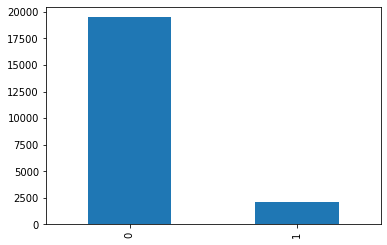

In [110]:
pd.value_counts(dummy_view_test["view_yes"]).sort_index().plot.bar()

In [111]:
df["view_yes"] = dummy_view_test["view_yes"]

## renovated yes or no

In [153]:
df["renoyes"] = (df["yr_renovated"] > 0) 
dummy_reno_yes = pd.get_dummies(df["renoyes"], prefix="reno_yes")
df["reno_yes"]=dummy_reno_yes["reno_yes_True"]
df.drop("renoyes", axis =1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale,view_yes,reno_last_10_yrs,reno_yes
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,47.5112,-122.257,1340,5650,0,2014,10,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,47.7210,-122.319,1690,7639,400,2014,12,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,47.7379,-122.233,2720,8062,0,2015,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,47.5208,-122.393,1360,5000,910,2014,12,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,47.6168,-122.045,1800,7503,0,2015,2,0,0,0


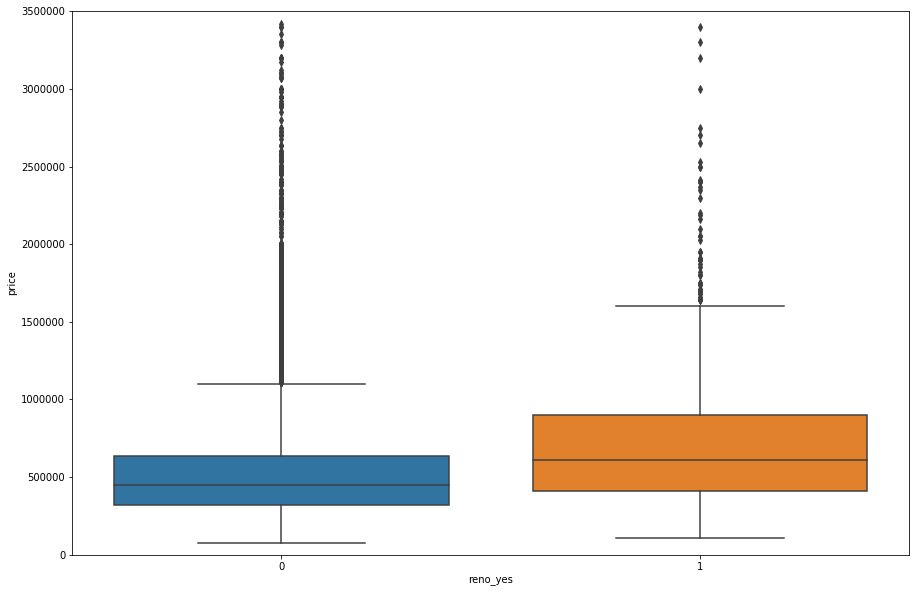

In [179]:
data_reno_yes = pd.concat([df["price"], df["reno_yes"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="reno_yes", y="price", data=data_reno_yes)
fig.axis(ymin=0, ymax=3500000);

## renovated in the last 10 years 

In [141]:
df["reno_last_10yrs"] = (df["yr_renovated"] >= 2005) 
dummy_reno = pd.get_dummies(df["reno_last_10yrs"], prefix="reno")
df["reno_last_10_yrs"]=dummy_reno["reno_True"]
df.drop("reno_last_10yrs", axis =1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale,view_yes,reno_last_10_yrs
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340,5650,0,2014,10,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,400,2014,12,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,0,2015,2,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,910,2014,12,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,0,2015,2,0,0


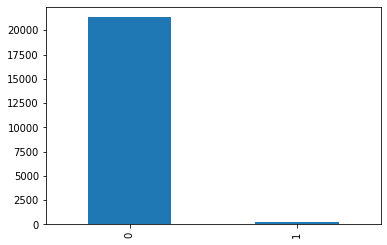

In [142]:
pd.value_counts(df["reno_last_10_yrs"]).plot.bar()

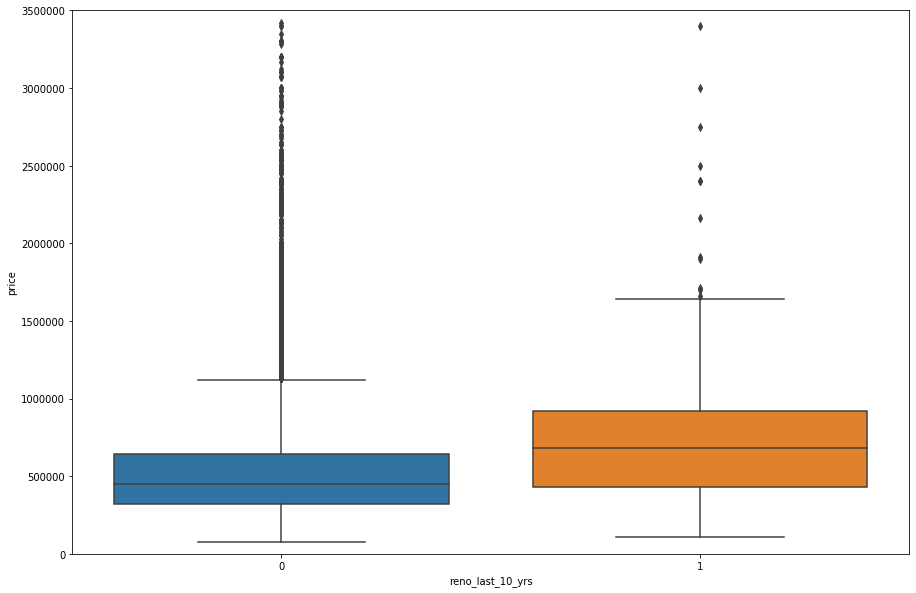

In [180]:
data_reno_last_10_yrs = pd.concat([df["price"], df["reno_last_10_yrs"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="reno_last_10_yrs", y="price", data=data_reno_last_10_yrs)
fig.axis(ymin=0, ymax=3500000);

# predictive modeling

In [185]:
variable_set = ["grade", "lat", "sqft_living", "sqft_living15", "view_yes"]

In [186]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [187]:
X = df[variable_set]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

## multivariate linear regression

In [188]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          1.699e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:50:04   Log-Likelihood:                     -2.0018e+05
No. Observations:               14469   AIC:                                  4.004e+05
Df Residuals:                   14464   BIC:                                  4.004e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade          8.361e+04   2966.344     28.187      0.000    7.78e+04    8.94e+04
lat           -1.074e+04    343.551    -31.252      0.000   -1.14e+04   -1.01e+04
sqft_living     176.9309      3.929     45.027      0.000     169.229     184.633
sqft_living15    13.5537      5.040      2.689      0.007       3.675      23.432
view_yes       1.952e+05   7175.110     27.212      0.000    1.81e+05    2.09e+05
==============================================================================
Omnibus:                    12525.575   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1146176.651
Skew:                           3.706   Prob(JB):                         0.00
Kurtosis:                      45.968   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Root mean squared error (RMSE)

In [189]:
linereg =LinearRegression()
linereg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
print(linereg.coef_)
print(linereg.intercept_)
zip(variable_set, linereg.coef_)

[7.34567731e+04 6.54192964e+05 1.80556611e+02 1.45362857e+01
 2.01574843e+05]
-31557366.993208017


In [191]:
y_pred = linereg.predict(X_test)
y_pred

array([837437.18552445, 260662.43306695, 260662.43306695, ...,
       291746.77055635, 436409.37112622, 291550.51266719])

In [192]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

217568.71511694312


## multicollinearity

# data visualization